In [0]:
# Using google colab - this first step is for loading in the data from my personal Drive

# Login with google credentials

from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Handle errors from too many requests

import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

# The ID for my personal Drive folder is 1BVUuroPvozFxMjMIYrGOFtI4r6erSBCx
# I am now listing the ID numbers for the files in this folder to find the data files

#file_list = drive.ListFile({'q': "'1BVUuroPvozFxMjMIYrGOFtI4r6erSBCx' in parents and trashed=false"}).GetList()
#for file1 in file_list:
#  print('title: %s, id: %s' % (file1['title'], file1['id']))

# Data ID: 1X3jE2jcPSApTsIpgUOk6B_j6eEz0oAII

# Now that I have the ID files, load the files

data_downloaded = drive.CreateFile({'id': '1X3jE2jcPSApTsIpgUOk6B_j6eEz0oAII'})
data_downloaded.GetContentFile('walmart_data.csv')

data_downloaded = drive.CreateFile({'id': '1xz5KFsXBlbuzG8OW2xDzj_ahecKkCPma'})
data_downloaded.GetContentFile('walmart_train.csv')

data_downloaded = drive.CreateFile({'id': '1_EJmcz0xgKSid6xbrOIeiu2mLG3HKEQP'})
data_downloaded.GetContentFile('walmart_test.csv')

INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/discovery/v1/apis/drive/v2/rest
INFO:oauth2client.transport:Attempting refresh to obtain initial access_token
INFO:oauth2client.client:Refreshing access_token
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1X3jE2jcPSApTsIpgUOk6B_j6eEz0oAII?alt=json
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1xz5KFsXBlbuzG8OW2xDzj_ahecKkCPma?alt=json
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1_EJmcz0xgKSid6xbrOIeiu2mLG3HKEQP?alt=json


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import seaborn as sns
from  IPython.display import display, HTML, display_html

In [0]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df =pd.read_csv('walmart_train.csv')

In [0]:
df.head()

,Store,Dept,Date,Weekly_Sales
0,1,1,2010-02-05,24924.50
1,1,1,2010-02-12,46039.49
2,1,1,2010-02-19,41595.55
3,1,1,2010-02-26,19403.54
4,1,1,2010-03-05,21827.90


In [0]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [0]:
# Dataframe of one store, run same analysis

df_store1 = df[df['Store'] == 1]

df_store1.describe()

df_store1 =df_store1.rename(columns ={'Date':'ds','Weekly_Sales':'ts'})
df_store1_example = df_store1.groupby(by ='ds').agg({'ts':'sum'})
df_store1_example.index=pd.to_datetime(df_store1_example.index)
df_store1_example = df_store1_example.asfreq(freq='7D')

df_store1_example = df_store1_example.sort_index(ascending = True)
df_store1_example = df_store1_example.fillna( value=0 ) # Should be unnecessary - no na values in cleaned DF

# Dataframe of one store, run same analysis

df_store1_dept1 = df[df['Store'] == 1]
df_store1_dept1 = df_store1_dept1[df_store1_dept1['Dept'] == 1]
df_store1_dept1.describe()

df_store1_dept1 =df_store1_dept1.rename(columns ={'Date':'ds','Weekly_Sales':'ts'})
df_store1_dept1_example = df_store1_dept1.groupby(by ='ds').agg({'ts':'sum'})
df_store1_dept1_example.index=pd.to_datetime(df_store1_dept1_example.index)
df_store1_dept1_example = df_store1_dept1_example.asfreq(freq='7D')

df_store1_dept1_example = df_store1_dept1_example.sort_index(ascending = True)
df_store1_dept1_example = df_store1_dept1_example.fillna( value=0 ) # Should be unnecessary - no na values in cleaned DF

df_store1_dept1_example

,ts
ds,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
...,...
2012-09-28,18947.81
2012-10-05,21904.47
2012-10-12,22764.01


In [0]:
df =df.rename(columns ={'Date':'ds','Weekly_Sales':'ts'})
df_example = df.groupby(by ='ds').agg({'ts':'sum'})
df_example.index=pd.to_datetime(df_example.index)
df_example = df_example.asfreq(freq='7D')

df_example = df_example.sort_index(ascending = True)
df_example = df_example.fillna( value=0 ) # Should be unnecessary - no na values in cleaned DF

In [0]:
df_store1_example

,ts
ds,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [0]:
scale_factor = max(df_example['ts']) - min(df_example['ts'])
print(scale_factor)

41331562.610000014


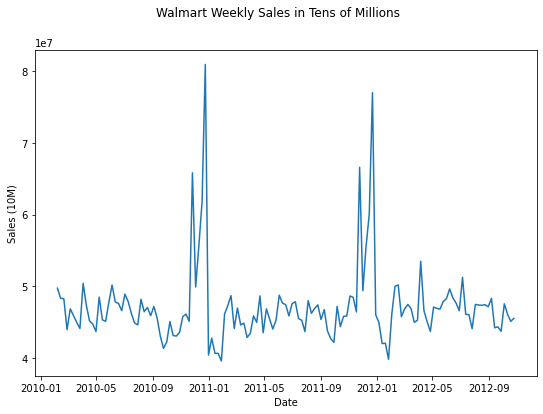

In [0]:
f , ax = plt.subplots(1,1, figsize=(9, 6))

f.suptitle('Walmart Weekly Sales in Tens of Millions', fontsize=12)
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Sales (10M)', fontsize='medium')   # relative to plt.rcParams['font.size']

ax.plot(df_example['ts'])

In [0]:
#f , ax = plt.subplots(1,1)
#ax.plot(df_test_weekly['ts'])

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

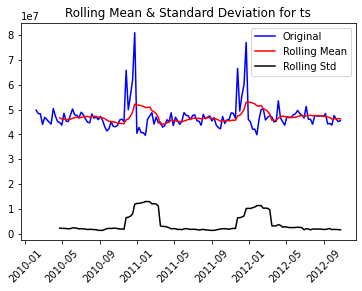

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
# Lags Used                    4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [0]:
test_stationarity(df = df_example, ts = 'ts')

In [0]:
def plot_transform(df, ts, ts_transform):

  f , ax = plt.subplots(1,1)
  ax.plot(df[ts])
  ax.plot(df[ts_transform], color = 'red')

In [0]:
def log_trans(df, ts): return df[ts].apply(lambda x:np.log(x)) 

In [0]:
df_example['ts_log']= df_example['ts'].apply(lambda x: np.log(x))
#plot_transform(df_example, 'ts','ts_log')

In [0]:
df_example['ts_log_moving_avg'] = df_example['ts_log'].rolling(window = 14, center= False).mean()

In [0]:
df_example['ts_moving_avg'] = df_example['ts'].rolling(window =14 , center= False).mean()
df_example['ts_log_diff'] = df_example['ts_log'].diff()
df_example['ts_moving_avg_diff'] = df_example['ts']-df_example['ts_moving_avg']
df_example['ts_log_ewma']=df_example['ts_log'].ewm(halflife =14, ignore_na =False,min_periods=0, adjust=True).mean()
df_example['ts_log_ewma_diff']=df_example['ts_log']-df_example['ts_log_ewma']

df_example_trans=df_example.dropna()

In [0]:
df_example_trans['ts_log_ewma']=df_example_trans['ts_log'].ewm(halflife =14, ignore_na =False,min_periods=0, adjust=True).mean()
df_example_trans['ts_log_ewma_diff']=df_example_trans['ts_log']-df_example_trans['ts_log_ewma']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_store1_example['ts_log']= df_store1_example['ts'].apply(lambda x: np.log(x))
df_store1_example['ts_log_moving_avg'] = df_store1_example['ts_log'].rolling(window = 14, center= False).mean()


#plot_transform(df_example, 'ts','ts_log')
df_store1_example['ts_moving_avg'] = df_store1_example['ts'].rolling(window =14 , center= False).mean()
df_store1_example['ts_log_diff'] = df_store1_example['ts_log'].diff()
df_store1_example['ts_moving_avg_diff'] = df_store1_example['ts']-df_store1_example['ts_moving_avg']
df_store1_example['ts_log_ewma']=df_store1_example['ts_log'].ewm(halflife =14, ignore_na =False,min_periods=0, adjust=True).mean()
df_store1_example['ts_log_ewma_diff']=df_store1_example['ts_log']-df_store1_example['ts_log_ewma']

#plot_transform(df_example, 'ts','ts_log_ewma')
df_store1_example_trans=df_store1_example.dropna()

df_store1_example_trans['ts_log_ewma']=df_store1_example_trans['ts_log'].ewm(halflife =14, ignore_na =False,min_periods=0, adjust=True).mean()
df_store1_example_trans['ts_log_ewma_diff']=df_store1_example_trans['ts_log']-df_store1_example_trans['ts_log_ewma']

####

df_store1_dept1_example

df_store1_dept1_example['ts_log']= df_store1_dept1_example['ts'].apply(lambda x: np.log(x))
df_store1_dept1_example['ts_log_moving_avg'] = df_store1_dept1_example['ts_log'].rolling(window = 14, center= False).mean()


#plot_transform(df_example, 'ts','ts_log')
df_store1_dept1_example['ts_moving_avg'] = df_store1_dept1_example['ts'].rolling(window =14 , center= False).mean()
df_store1_dept1_example['ts_log_diff'] = df_store1_dept1_example['ts_log'].diff()
df_store1_dept1_example['ts_moving_avg_diff'] = df_store1_dept1_example['ts']-df_store1_dept1_example['ts_moving_avg']
df_store1_dept1_example['ts_log_ewma']=df_store1_dept1_example['ts_log'].ewm(halflife =14, ignore_na =False,min_periods=0, adjust=True).mean()
df_store1_dept1_example['ts_log_ewma_diff']=df_store1_dept1_example['ts_log']-df_store1_dept1_example['ts_log_ewma']

#plot_transform(df_example, 'ts','ts_log_ewma')
df_store1_dept1_example_trans=df_store1_dept1_example.dropna()

df_store1_dept1_example_trans['ts_log_ewma']=df_store1_dept1_example_trans['ts_log'].ewm(halflife =14, ignore_na =False,min_periods=0, adjust=True).mean()
df_store1_dept1_example_trans['ts_log_ewma_diff']=df_store1_dept1_example_trans['ts_log']-df_store1_dept1_example_trans['ts_log_ewma']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [0]:
df_store1_example_trans.head(5)

,ts,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
ds,,,,,,,,
2010-05-07,1603955.12,14.287983,14.228912,1.514671e+06,0.118230,89284.040000,14.287983,0.000000
2010-05-14,1494251.50,14.217136,14.222103,1.503997e+06,-0.070847,-9745.337143,14.251683,-0.034547
2010-05-21,1399662.07,14.151741,14.210699,1.486690e+06,-0.065395,-87027.955000,14.216707,-0.064965
2010-05-28,1432069.95,14.174631,14.202246,1.473840e+06,0.022890,-41770.202143,14.205394,-0.030763
2010-06-04,1615524.71,14.295170,14.211979,1.488540e+06,0.120539,126984.763571,14.225170,0.070000


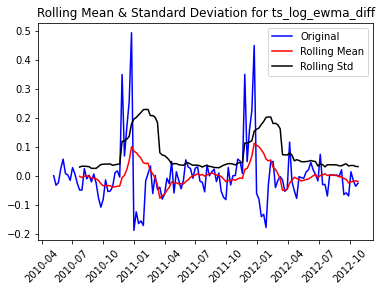

Results of Dickey-Fuller Test:
Test Statistic                -6.159141e+00
p-value                        7.245226e-08
# Lags Used                    4.000000e+00
Number of Observations Used    1.250000e+02
Critical Value (1%)           -3.483779e+00
Critical Value (5%)           -2.884954e+00
Critical Value (10%)          -2.579257e+00
dtype: float64


In [0]:
test_stationarity(df_example_trans, 'ts_log_ewma_diff')

## Decomposition Analysis

In [0]:
def plot_decomposition(df, ts,trend,seasonal, residual):

  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  #plt.subtitle('Signal Decomposition of  %s' %(ts), x =0.5, y= 1.05, fontsize = 18)
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



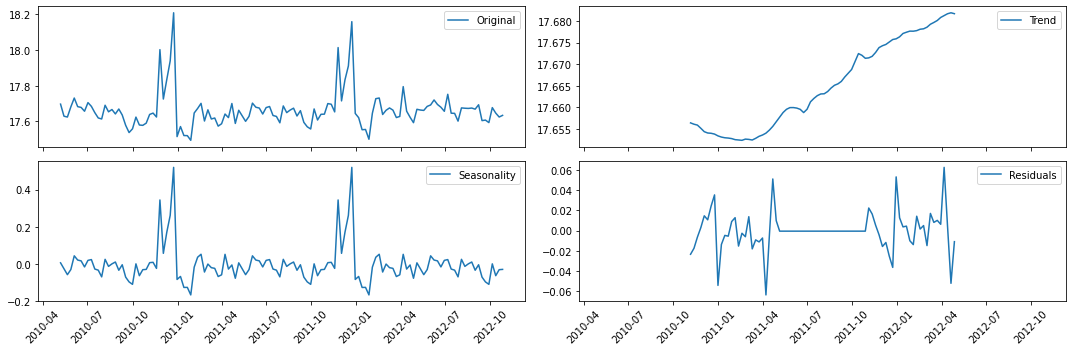

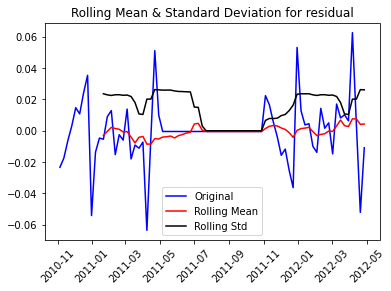

Results of Dickey-Fuller Test:
Test Statistic                -7.422712e+00
p-value                        6.671144e-11
# Lags Used                    1.000000e+00
Number of Observations Used    7.600000e+01
Critical Value (1%)           -3.519481e+00
Critical Value (5%)           -2.900395e+00
Critical Value (10%)          -2.587498e+00
dtype: float64


In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_example_trans['ts_log'], freq = 52)

df_example_trans.loc[:,'trend'] = decomposition.trend
df_example_trans.loc[:,'seasonal'] = decomposition.seasonal
df_example_trans.loc[:,'residual'] = decomposition.resid

plot_decomposition(df = df_example_trans, ts= 'ts_log',trend='trend', seasonal='seasonal',residual='residual')

test_stationarity(df_example_trans.dropna(), ts='residual')

In [0]:
def plot_acf_pacf(df, ts):
  """
  Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
  """
  f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

  #Plot ACF: 

  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Autocorrelation Function for %s' %(ts))

  #Plot PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Partial Autocorrelation Function for %s' %(ts))
  
  plt.tight_layout()
  plt.show()
  plt.close()
  
  return

In [0]:
df_example

,ts,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
ds,,,,,,,,
2010-02-05,49750740.50,17.722536,NaN,NaN,NaN,NaN,17.722536,0.000000
2010-02-12,48336677.63,17.693701,NaN,NaN,-0.028835,NaN,17.707762,-0.014061
2010-02-19,48276993.78,17.692466,NaN,NaN,-0.001236,NaN,17.702409,-0.009943
2010-02-26,43968571.13,17.598986,NaN,NaN,-0.093480,NaN,17.674602,-0.075617
2010-03-05,46871470.30,17.662920,NaN,NaN,0.063934,NaN,17.672029,-0.009109
...,...,...,...,...,...,...,...,...
2012-09-28,43734899.40,17.593657,17.655020,4.654306e+07,-0.014069,-2.808163e+06,17.663484,-0.069827
2012-10-05,47566639.31,17.677642,17.656491,4.661231e+07,0.083985,9.543249e+05,17.664169,0.013474
2012-10-12,46128514.25,17.646942,17.648966,4.624628e+07,-0.030700,-1.177639e+05,17.663336,-0.016394


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



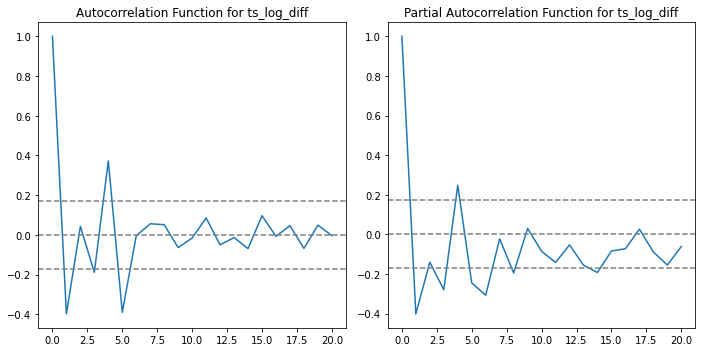

In [0]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(np.array(df_example_trans['ts_log_diff']),nlags=20)
lag_pacf=pacf(np.array(df_example_trans['ts_log_diff']),nlags=20)

plot_acf_pacf(df=df_example_trans, ts= 'ts_log_diff')

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def run_arima(df,ts,p,d,q):
  
  model=ARIMA(df[ts], order=(p,d,q))
  results_arima=model.fit(disp=-1)

  len_results = len(results_arima.fittedvalues)
  ts_modified = df[ts][-len_results:]

  rss  = sum((results_arima.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss/ len(df[ts]))

  print(calculate_mape((ts_modified*scale_factor) + min(df_example['ts']), results_arima.fittedvalues*scale_factor + min(df_example['ts'])))

  print(rmse)
  print(str(rmse * scale_factor))

  print(ts_modified)

  plt.figure(figsize=(12,8))

  plt.title('Walmart Weekly Change In Sales', fontsize=12)
  plt.xlabel('Date', fontsize=10)
  plt.ylabel('Sales, Normalized', fontsize='medium')   # relative to plt.rcParams['font.size']

  plt.plot(df[ts])
  plt.plot(results_arima.fittedvalues, color='red')

  plt.show()

  return results_arima


In [0]:
df_example

,ts,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
ds,,,,,,,,
2010-02-05,49750740.50,17.722536,NaN,NaN,NaN,NaN,17.722536,0.000000
2010-02-12,48336677.63,17.693701,NaN,NaN,-0.028835,NaN,17.707762,-0.014061
2010-02-19,48276993.78,17.692466,NaN,NaN,-0.001236,NaN,17.702409,-0.009943
2010-02-26,43968571.13,17.598986,NaN,NaN,-0.093480,NaN,17.674602,-0.075617
2010-03-05,46871470.30,17.662920,NaN,NaN,0.063934,NaN,17.672029,-0.009109
...,...,...,...,...,...,...,...,...
2012-09-28,43734899.40,17.593657,17.655020,4.654306e+07,-0.014069,-2.808163e+06,17.663484,-0.069827
2012-10-05,47566639.31,17.677642,17.656491,4.661231e+07,0.083985,9.543249e+05,17.664169,0.013474
2012-10-12,46128514.25,17.646942,17.648966,4.624628e+07,-0.030700,-1.177639e+05,17.663336,-0.016394


5.582840941375136
4575812.823276147
189125494196879.0
ds
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Freq: 7D, Name: ts, Length: 143, dtype: float64


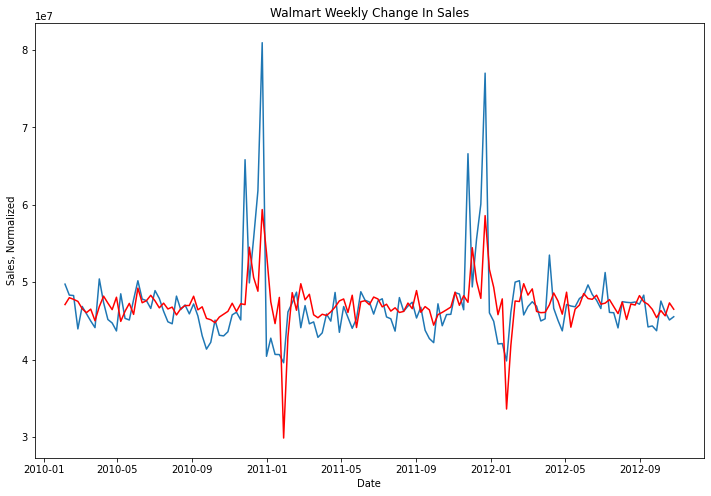

In [0]:
model_AR = run_arima(df= df_example, ts='ts',p=6,d=0,q=1)

In [0]:
!pip install pystan
!pip install fbprophet

from fbprophet import Prophet

import datetime
from datetime import datetime



In [0]:
def days_between(d1,d2):
  d1 = datetime.strptime(d1, "%Y-%m-%d")
  d2 = datetime.strptime(d2, "%Y-%m-%d")
  
  return abs((d2-d1).days + 1 )

In [0]:
df_prophet_1store_1dept

,ds,y
0,2010-05-07,17413.94
1,2010-05-14,18926.74
2,2010-05-21,14773.04
3,2010-05-28,15580.43
4,2010-06-04,17558.09
...,...,...
125,2012-09-28,18947.81
126,2012-10-05,21904.47
127,2012-10-12,22764.01
128,2012-10-19,24185.27


In [0]:
# Inputs for query

date_column = 'dt'
metric_column = 'ts'
table = df_example
start_training_date = '2010-02-05'
end_training_date = '2012-05-04'
start_forecasting_date = '2012-05-05'
end_forecasting_date = '2012-10-26'
year_to_estimate = '2012'

# Inputs for forecasting

future_num_points = days_between(start_forecasting_date, end_forecasting_date)
print(future_num_points)
cap = None

growth = 'linear'

n_changepoints = 25 
changepoint_prior_scale = 0.05 
changepoints = None 

holidays_prior_scale = 100

interval_width = 0.8 
mcmc_samples = 0

#holiday: default = None
thanksgiving = pd.DataFrame({
  'holiday': 'thanksgiving',
  'ds': pd.to_datetime(['2010-11-25', '2011-11-24']),
  'lower_window': 0,
  'upper_window': 3,
})
christmas = pd.DataFrame({
  'holiday': 'christmas',
  'ds': pd.to_datetime(['2010-12-25', '2011-12-25']),
  'lower_window': -1,
  'upper_window': 0,
})
holidays = pd.concat((thanksgiving,christmas))
#holidays = None

daily_seasonality = True

df_prophet = df_example_trans[['ts']]
df_prophet= df_prophet.reset_index()
df_prophet = df_prophet.rename(columns = {'ds':'ds','ts':'y'})
df_prophet['ds']=pd.to_datetime(df_prophet['ds'])
df_prophet['y']=pd.to_numeric(df_prophet['y'], errors='ignore')

175


In [0]:

df_prophet_train = df_prophet[0:105]
df_prophet_test = df_prophet[105:]

print(len(df_prophet))
print(len(df_prophet_train))
print(len(df_prophet_test))

df_store1_example_trans

df_prophet_1store = df_store1_example_trans[['ts']]
df_prophet_1store= df_prophet_1store.reset_index()
df_prophet_1store = df_prophet_1store.rename(columns = {'ds':'ds','ts':'y'})
df_prophet_1store['ds']=pd.to_datetime(df_prophet_1store['ds'])
df_prophet_1store['y']=pd.to_numeric(df_prophet_1store['y'], errors='ignore')

df_store1_dept1_example_trans

df_prophet_1store_1dept = df_store1_dept1_example_trans[['ts']]
df_prophet_1store_1dept= df_prophet_1store_1dept.reset_index()
df_prophet_1store_1dept = df_prophet_1store_1dept.rename(columns = {'ds':'ds','ts':'y'})
df_prophet_1store_1dept['ds']=pd.to_datetime(df_prophet_1store_1dept['ds'])
df_prophet_1store_1dept['y']=pd.to_numeric(df_prophet_1store_1dept['y'], errors='ignore')

130
105
25


In [0]:
def daily_forecast(df,holidays,growth,n_changepoints=29,holidays_prior_scale=1,changepoint_prior_scale =0.03,
                   changepoints=None,interval_width =0.9, mcmc_samples=1, future_num_points =52, daily_seasonality =True):
  df_c=df.copy()
  m = Prophet(growth = growth,
              n_changepoints = n_changepoints,
              changepoint_prior_scale = changepoint_prior_scale,
              changepoints = changepoints,
              holidays = holidays,
              holidays_prior_scale = holidays_prior_scale,
              interval_width = interval_width,
              mcmc_samples = mcmc_samples, 
              daily_seasonality = daily_seasonality)
  m.fit(df_c)
  future = m.make_future_dataframe(periods =future_num_points)
  forecst = m.predict(future)

  m.plot(forecst);
  m.plot_components(forecst)

  return forecst

def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return
  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


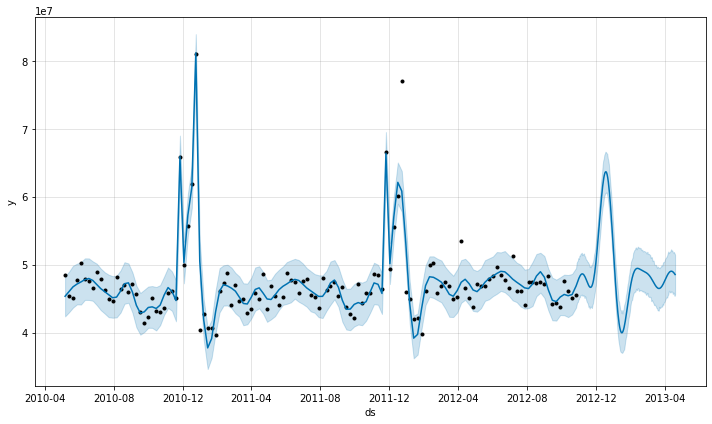

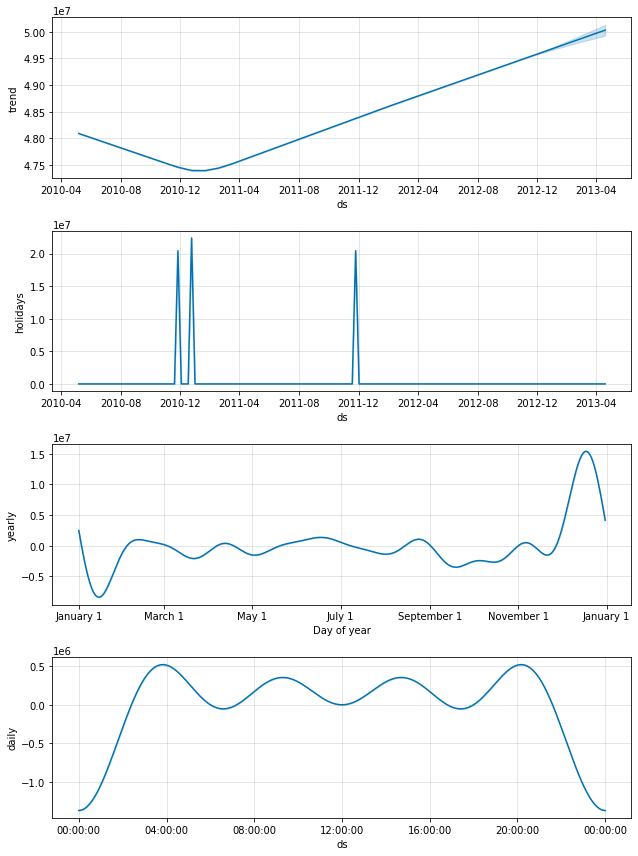

In [0]:
forecast=daily_forecast(df_prophet,holidays,growth,n_changepoints,holidays_prior_scale,
                       changepoint_prior_scale,changepoints,interval_width,mcmc_samples,future_num_points,daily_seasonality)

## Calculate Metrics

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


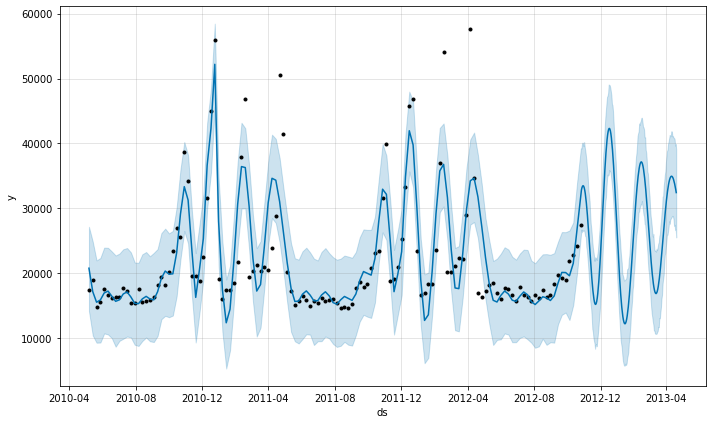

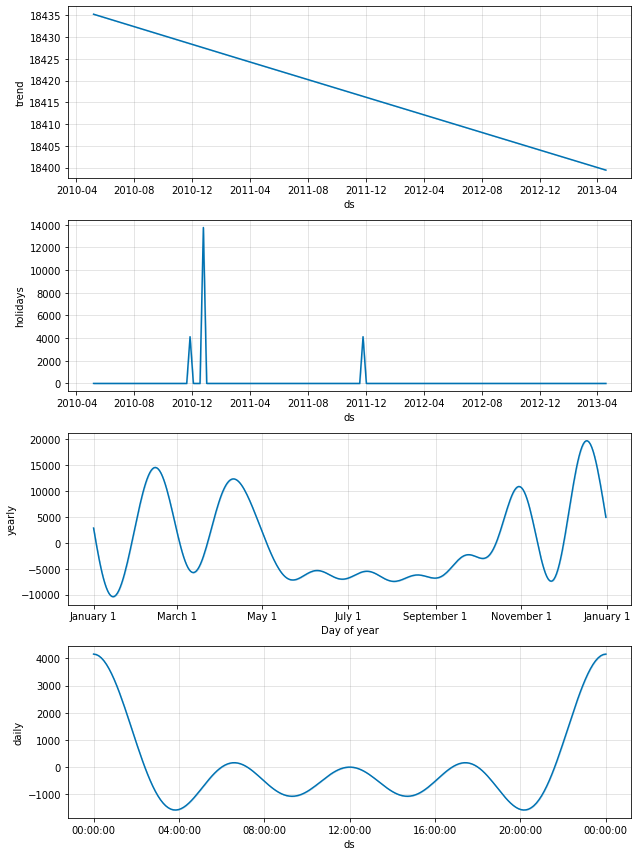

In [0]:
forecast=daily_forecast(df_prophet_1store_1dept,holidays,growth,n_changepoints,holidays_prior_scale,
                       changepoint_prior_scale,changepoints,interval_width,mcmc_samples,future_num_points,daily_seasonality)

In [0]:
df_prophet

,ds,y
0,2010-05-07,48503243.52
1,2010-05-14,45330080.20
2,2010-05-21,45120108.06
3,2010-05-28,47757502.56
4,2010-06-04,50188543.12
...,...,...
125,2012-09-28,43734899.40
126,2012-10-05,47566639.31
127,2012-10-12,46128514.25
128,2012-10-19,45122410.57


In [0]:
print_error_metrics(y_true = df_prophet_1store_1dept['y'][105:], y_pred = forecast['yhat'][105:])

MAPE: 5.921874
MPE: 2.134467
MAE: 117442.310128
RMSE: 1591.032131


In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential as Sequential
from keras.layers import Dense as Dense
from keras.layers import LSTM as LSTM

def ts_lstm_model(df, ts, look_back, epochs, type_ = None, train_fraction = 0.67):

  def create_dataset(dataset, look_back = 1):

    X, Y =[],[]
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      X.append(a)
      Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

  np.random.seed(7)
  dataset = df['ts'].values.astype('float32')

  scaler = MinMaxScaler(feature_range = (0,1))
  dataset = scaler.fit_transform(dataset.reshape(-1,1))
  

  train_size = int(len(dataset) * train_fraction)
  test_size  = len(dataset) - train_size


  train = dataset[:train_size,:]
  test  = dataset[train_size:,:]

  look_back =look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)


  if type_ == 'regresion with time steps':
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
  elif type_ == 'stacked with memory between between batches':
    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
  else: 
    trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
    testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

  # LSTM Creation
  batch_size = 1
  model = keras.Sequential()

  if type_=='regression with time steps':
    model.add(tf.keras.layers.LSTM(4,input_shape=(look_back,1)))
  elif type_ =='memory between batches':
    model.add(tf.keras.layers.LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateteful = True))
  elif  type_=='stacked with memory between batches':
    model.add(tf.keras.layers.LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(tf.keras.layers.LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(tf.keras.layers.LSTM(4, input_shape = (1, look_back)))

  model.add(tf.keras.layers.Dense(1))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam')

  model.summary()

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
      for i in range(100):
        model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
        model.reset_states()
  else:
      model.fit(trainX, 
                trainY, 
                epochs = epochs, 
                batch_size = 1, 
                verbose = 1)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  mape = calculate_mape(testY[0], testPredict[:,0])
  print('Test Score: %.2f RMSE' % (testScore))
  print('Test Score: %.2f MAPE' % (mape))
  
  # Shift train predictions for plotting
  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  # Plot baseline and predictions
  plt.figure()
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()
  plt.close()

  return

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
69/69 [==============================] - 0s 4ms/step - loss: 0.0287
Epoch 2/120
69/69 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 3/120
69/69 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 4/120
69/69 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 5/120
69/69 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch 6/120
69/69 [==============================] - 0s 3ms/step - loss: 0.0200
Epoch 7/120
69/69 [===================

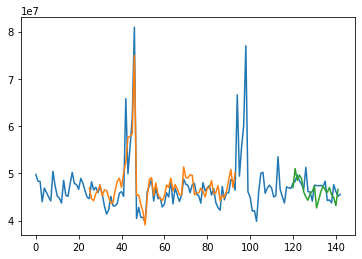

In [0]:
#ts_lstm_model(df,df_prophet, 4, 100)
test =  ts_lstm_model(df_example, df_prophet, look_back= 25, epochs = 120)